# Quanvolution (Quantum convolution) for MNIST image classification with [TorchQuantum](https://github.com/mit-han-lab/torchquantum).
<p align="left">
<img src="https://github.com/mit-han-lab/torchquantum/blob/master/torchquantum_logo.jpg?raw=true" alt="torchquantum Logo" width="250">
</p>

Tutorial Author: Zirui Li, Hanrui Wang


### Outline
1. Introduction to Quanvolutional Neural Network.
2. Build and train a Quanvolutional Neural Network.
  - a.  Compare Quanvolutional Neural Network with a classic model.
  - b. Evaluate on real quantum computer.
3. Compare multiple models with or without a trainable quanvolutional filter.

In this tutorial, we use `tq.QuantumDevice`, `tq.GeneralEncoder`, `tq.RandomLayer`, `tq.MeasureAll`, `tq.PauliZ` class from TrochQuantum.

You can learn how to build, train and evaluate a quanvolutional filter using TorchQuantum in this tutorial.

## Introduction to Quanvolutional Neural Network.
### Convolutional Neural Network
Convolutional neural network is a classic neural network genre, mostly applied to anylize visual images. They are known for their convolutional layers that perform convolution. Typically the convolution operation is the Frobenius inner product of the convolution filter with the input image followed by an activation function. The convolution filter slides along the input image and generates a feature map. We can use the feature map for classification.

<div align="center">
<img src="https://github.com/mit-han-lab/torchquantum/blob/master/figs/conv-full-layer.gif?raw=true" alt="conv-full-layer" width="300">
</div>

### Quantum convolution
One can extend the same idea also to the context of quantum variational circuits. Replace the classical convolution filters with variational quantum circuits and we get quanvolutional neural networks with quanvolutional filters. The quanvolutional filters perform more complex operations in a higher dimension Hilbert space than Frobenius inner product. Therefore, quanvolutional filters have more potential than traditional convolution filters.

<div align="center">
<img src="https://github.com/mit-han-lab/torchquantum/blob/master/figs/hybridmodel.png?raw=true" alt="conv-full-layer" width="800">
</div>

## Build and train a Quanvolutional Neural Network.

### Installation
Install torchquantum and all the libs we need.

In [ ]:
!pip install qiskit==0.32.1

     |████████████████████████████████| 6.1 MB 4.1 MB/s 
     |████████████████████████████████| 17.9 MB 633 kB/s 
     |████████████████████████████████| 237 kB 73.3 MB/s 
     |████████████████████████████████| 207 kB 65.4 MB/s 
     |████████████████████████████████| 2.1 MB 60.5 MB/s 
     |████████████████████████████████| 634 kB 68.2 MB/s 
     |████████████████████████████████| 1.6 MB 21.6 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
     |████████████████████████████████| 38.2 MB 116 kB/s 
     |████████████████████████████████| 943 kB 22.1 MB/s 
     |████████████████████████████████| 49 kB 8.3 MB/s 
     |████████████████████████████████| 3.6 MB 31.3 MB/s 
     |████████████████████████████████| 63 kB 814 kB/s 
     |████████████████████████████████| 6.4 MB 30.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.32.1-py3-none-any.whl size=11777 sha256=911365fec91e5c648d2569b156af429c0aff7c3d95d453a7d24e6bf8d7d1a315
  Stored in directory: /root/.cache/pip/whee

Download and cd to the repo.

In [ ]:
!git clone https://github.com/mit-han-lab/torchquantum.git

Cloning into 'torchquantum'...
remote: Enumerating objects: 10737, done.
remote: Counting objects: 100% (7529/7529), done.
remote: Compressing objects: 100% (3777/3777), done.
remote: Total 10737 (delta 3765), reused 7076 (delta 3348), pack-reused 3208
Receiving objects: 100% (10737/10737), 3.19 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (5732/5732), done.
Checking out files: 100% (50055/50055), done.


In [ ]:
%cd torchquantum

/content/torchquantum


Install torch-quantum.

In [ ]:
!pip install --editable .

Obtaining file:///content/torchquantum
     |████████████████████████████████| 11.2 MB 6.5 MB/s 
     |████████████████████████████████| 81 kB 12.1 MB/s 
     |████████████████████████████████| 895 kB 55.2 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 296 kB 57.1 MB/s 
     |████████████████████████████████| 58 kB 2.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Running setup.py develop for torchquantum
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Change PYTHONPATH and install other packages.

In [ ]:
%env PYTHONPATH=.

env: PYTHONPATH=.


Run the following code to store a qiskit token. You can replace it with your own token from your IBMQ account if you like.



In [ ]:
from qiskit import IBMQ
# IBMQ.save_account('', overwrite=True)

In [ ]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchquantum 0.1.0 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Step
Our code requires torchquantum lib, mnist dataset, pytorch and numpy. We need torch and the logsoftmax function from `torch.nn.functional`, optimizers(`optim`), `torchquantum` module, MNIST dataset(`MNIST`), cosine annealing learning rate(`CosineAnnealingLR`).


In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

import torchquantum as tq
import random

from torchquantum.dataset import MNIST
from torch.optim.lr_scheduler import CosineAnnealingLR

### Build a quanvolutional filter
Our quanvolution model is a hybrid model. It consists of two parts, the quanvolutional filter part and the classical layer part. To build the model, firstly we define our quanvolutional filter.

Our quanvolutional filter’s structure is the same as the figure described above. It has four qubits. The `tq.QuantumDevice` module stores the state vector. Usually a Quantum Neural Network module consists of three parts: encoder, ansatz and measurement. We can create an encoder by passing a list of gates to `tq.GeneralEncoder`. Each entry in the list contains `input_idx`, `func`, and `wires`. Here, each qubit has a rotation-Y gate. 4 RY gates in total. They can encode the 2x2 input data to the quantum state. Then we decide our ansatz to be a random layer. We call `tq.RandomLayer` to create an ansatz composed by 8 basic gates with no more than 8 trainable parameters. And finally we perform Pauli-Z measurements on each qubit by creating a `tq.MeasureAll` module and passing `tq.PauliZ` to it. The measure function will return four expectation values from four qubits. The four results go to four channels.

Next look at how quanvolutional filter works. We get the batch size. Our image is 28x28. So we reshape our input data to `(bsz, 28, 28)`.

We initialize the `data_list`. The list stores the outputs in each stride.

The double loop is to iterate all the possible positions that the quanvolutional filter window may stride in. Here the stride is 2.

Then we catenate the data in the 2x2 window. Here we catenate four lists to one big list, so we need to reshape the list to `(4, bsz)` and transpose it to `(bsz, 4)`.

Next if you want to use qiskit’s remote noise model or real quantum machine, you can set `use_qiskit=True` and pass these 5 parameters: `q_device`, `encoder`, `q_layer`, `measure`, and `data`. The `qiskit_processor` will receive these parameters, put the data in the encoder, run the while circuits and return the measurement result. Remember only when the model is doing an inference can you use qiskit remote.

If you are training or not using qiskit remote, you can run the three parts one by one on google colab’s GPU.

After each stride, we append the measurement result to `data_list`.

Finally, we catenate the `data_list` along dimension 1 and return the result.


In [2]:

class QuanvolutionFilter(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 4
        self.encoder = tq.GeneralEncoder(
            [
                {"input_idx": [0], "func": "ry", "wires": [0]},
                {"input_idx": [1], "func": "ry", "wires": [1]},
                {"input_idx": [2], "func": "ry", "wires": [2]},
                {"input_idx": [3], "func": "ry", "wires": [3]},
            ]
        )

        self.q_layer = tq.RandomLayer(n_ops=8, wires=list(range(self.n_wires)))
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, use_qiskit=False):
        bsz = x.shape[0]
        qdev = tq.QuantumDevice(self.n_wires, bsz=bsz, device=x.device)
        size = 28
        x = x.view(bsz, size, size)

        data_list = []

        for c in range(0, size, 2):
            for r in range(0, size, 2):
                data = torch.transpose(
                    torch.cat(
                        (x[:, c, r], x[:, c, r + 1], x[:, c + 1, r], x[:, c + 1, r + 1])
                    ).view(4, bsz),
                    0,
                    1,
                )
                if use_qiskit:
                    data = self.qiskit_processor.process_parameterized(
                        qdev, self.encoder, self.q_layer, self.measure, data
                    )
                else:
                    self.encoder(qdev, data)
                    self.q_layer(qdev)
                    data = self.measure(qdev)

                data_list.append(data.view(bsz, 4))

        result = torch.cat(data_list, dim=1).float()

        return result

### Build the whole hybrid model.

Then we look at the whole model. The whole model consists of a `QuanvolutionFilter` and full connect layer(`torch.nn.Linear`). The size of input is 4\*14\*14 because a 28x28 image after quanvolutional filter turns into a 4 channel 14x14 feature. As the task is MNIST 10 digits classification, the size of output is 10. At last the model perform `F.logsoftmax` to the result for classification.

<div align="center">
<img src="https://github.com/mit-han-lab/torchquantum/blob/master/figs/hybridmodel.png?raw=true" alt="conv-full-layer" width="800">
</div>

Here, we also has a model without quanvolutional filters used for comparison. Its full connect layer’s input size is simple 28x28.

<div align="center">
<img src="https://github.com/mit-han-lab/torchquantum/blob/master/figs/classicalmodel.png?raw=true" alt="conv-full-layer" width="400">
</div>

In [3]:
class HybridModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.qf = QuanvolutionFilter()
        self.linear = torch.nn.Linear(4*14*14, 10)
    
    def forward(self, x, use_qiskit=False):
        with torch.no_grad():
          x = self.qf(x, use_qiskit)
        x = self.linear(x)
        return F.log_softmax(x, -1)

class HybridModel_without_qf(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(28*28, 10)
    
    def forward(self, x, use_qiskit=False):
        x = x.view(-1, 28*28)
        x = self.linear(x)
        return F.log_softmax(x, -1)

### Load the dataset MNIST
We use MNIST classification dataset(10 digits and 1000 training samples).

The `root` is the folder that stores the dataset. If there’s no MNIST dataset in root, it will automatically download MNIST.
Next, we set the `train_valid_split_ratio`, `n_test_samples`, and `n_train_samples`.

The dataset now contains three splits, 'train', 'valid' and 'test'. For each split, we create a dataloader with a random sampler, `batch_size` is 10, `num_workers` is 8 and `pin_memory` is true.

In [32]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
dataset = MNIST(
    root='./mnist_data',
    train_valid_split_ratio=[0.9, 0.1],
    n_test_samples=300,
    n_train_samples=500,
)
dataflow = dict()

for split in dataset:
    sampler = torch.utils.data.RandomSampler(dataset[split])
    dataflow[split] = torch.utils.data.DataLoader(
        dataset[split],
        batch_size=20,
        sampler=sampler,
        num_workers=8,
        pin_memory=True)

[2024-03-19 19:29:07.901] Only use the front 500 images as TRAIN set.
[2024-03-19 19:29:07.949] Only use the front 300 images as TEST set.


Then we set use_cuda, it depends on whether cuda is available.

Create a device.

Initialize the model, `n_epochs` to 15, Adam optimizer and cosine annealing learning rate scheduler.



In [34]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("device")
model = HybridModel().to(device)
model_without_qf = HybridModel_without_qf().to(device)
n_epochs = 15
optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

device


### Train the model.

When training the model, we iterate the dataloader. Get the	`inputs` and `targets` data. Feed `inputs` to the model and get `outputs`. Calculate the negative loss likelihood loss(`F.nll_loss`). Reset all the gradients of parameters in the model to zero. Call `loss.backward()` to perform backpropagation. Call `optimizer.step()` to update all the parameters.

After each epoch, we will valid the model. In validation, we can use qiskit remote because we don’t need to calculate gradients.


In [31]:
accu_list1 = []
loss_list1 = []
accu_list2 = []
loss_list2 = []

def train(dataflow, model, device, optimizer):
    for feed_dict in dataflow['train']:
        inputs = feed_dict['image'].to(device)
        targets = feed_dict['digit'].to(device)

        outputs = model(inputs)
        loss = F.nll_loss(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"loss: {loss.item()}", end='\r')


def valid_test(dataflow, split, model, device, qiskit=False):
    target_all = []
    output_all = []
    with torch.no_grad():
        for feed_dict in dataflow[split]:
            inputs = feed_dict['image'].to(device)
            targets = feed_dict['digit'].to(device)

            outputs = model(inputs, use_qiskit=qiskit)

            target_all.append(targets)
            output_all.append(outputs)
        target_all = torch.cat(target_all, dim=0)
        output_all = torch.cat(output_all, dim=0)

    _, indices = output_all.topk(1, dim=1)
    masks = indices.eq(target_all.view(-1, 1).expand_as(indices))
    size = target_all.shape[0]
    corrects = masks.sum().item()
    accuracy = corrects / size
    loss = F.nll_loss(output_all, target_all).item()

    print(f"{split} set accuracy: {accuracy}")
    print(f"{split} set loss: {loss}")

    return accuracy, loss

for epoch in range(1, n_epochs + 1):
    # train
    print(f"Epoch {epoch}:")
    train(dataflow, model, device, optimizer)
    print(optimizer.param_groups[0]['lr'])

    # valid
    accu, loss = valid_test(dataflow, 'test', model, device, )
    accu_list1.append(accu)
    loss_list1.append(loss)
    scheduler.step()


Epoch 1:
0.004522542485937368597144
test set accuracy: 0.28
test set loss: 3.0044424533843994
Epoch 2:
0.004426283106939473448974
test set accuracy: 0.27666666666666667
test set loss: 3.0519778728485107
Epoch 3:
0.004322421568553529044135
test set accuracy: 0.27666666666666667
test set loss: 3.1105008125305176
Epoch 4:
0.004211367764821722445334
test set accuracy: 0.2866666666666667
test set loss: 3.152308464050293
Epoch 5:
0.004093559974371725665927
test set accuracy: 0.27666666666666667
test set loss: 3.194432258605957
Epoch 6:
0.003969463130731184099676
test set accuracy: 0.2733333333333333
test set loss: 3.227104663848877
Epoch 7:
0.003839566987447492672156
test set accuracy: 0.28
test set loss: 3.259305000305176
Epoch 8:
0.003704384185254288712474
test set accuracy: 0.2833333333333333
test set loss: 3.293694257736206
Epoch 9:
0.003564448228912682256275
test set accuracy: 0.28
test set loss: 3.3144454956054688
Epoch 10:
0.003420311381711695843484
test set accuracy: 0.28
test set lo

Train the model without quanvolutional filters.

In [ ]:
optimizer = optim.Adam(model_without_qf.parameters(), lr=5e-3, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)
for epoch in range(1, n_epochs + 1):
    # train
    print(f"Epoch {epoch}:")
    train(dataflow, model_without_qf, device, optimizer)
    print(optimizer.param_groups[0]['lr'])

    # valid
    accu, loss = valid_test(dataflow, 'test', model_without_qf, device)
    accu_list2.append(accu)
    loss_list2.append(loss)

    scheduler.step()

### Compare Quanvolutional Neural Network with classical model.

After training, we can plot the accuracy and loss curve. We can see that model with quanvolutional filter can achieve slightly higher accuracy than model without quanvolution.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(accu_list1, label="with quanvolution filter")
ax1.plot(accu_list2, label="without quanvolution filter")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(loss_list1, label="with quanvolution filter")
ax2.plot(loss_list2, label="without quanvolution filter")
ax2.set_ylabel("Loss")
ax2.set_ylim([0, 3])
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()


Here we can also see the image before quanvolutional filter and after quanvolutional filter.

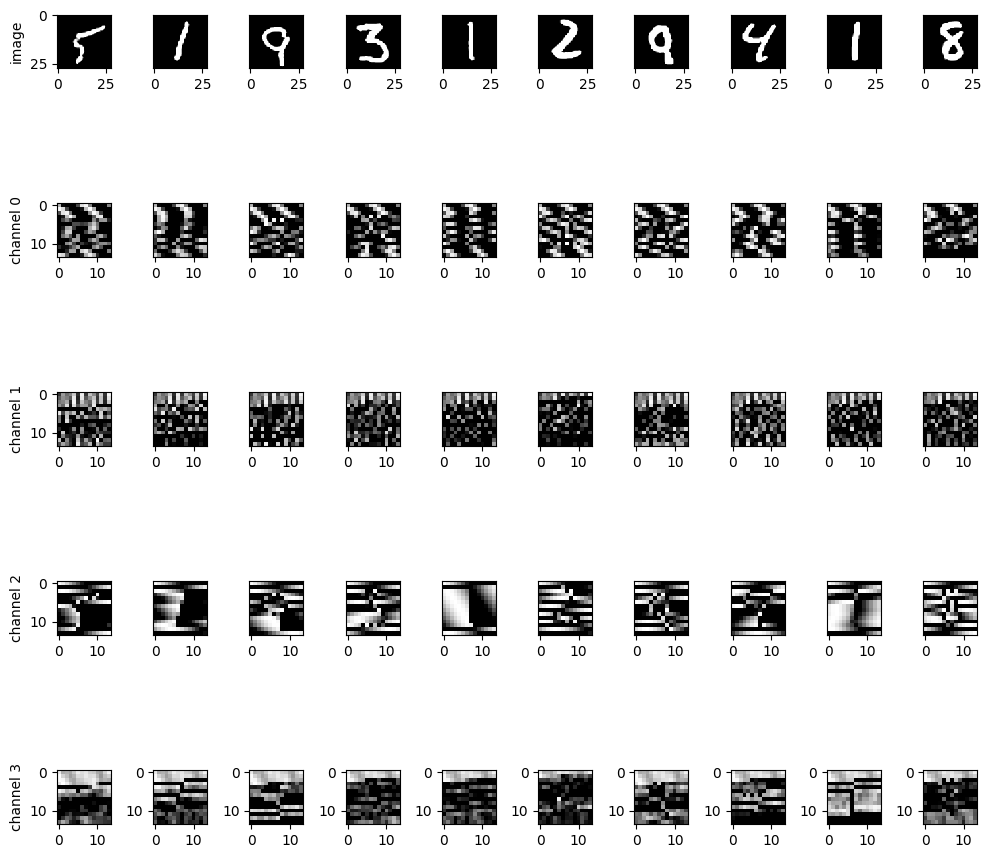

In [22]:
import matplotlib.pyplot as plt
import matplotlib

n_samples = 10
n_channels = 4
for feed_dict in dataflow['test']:
  inputs = feed_dict['image'].to(device)
  break 
sample = inputs[:n_samples]
after_quanv = model.qf(sample).view(n_samples, 14*14, 4).cpu().detach().numpy()

fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("image")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    
    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
    
    axes[0, k].imshow(sample[k, 0, :, :].cpu(), norm=norm, cmap="gray")

    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("channel {}".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(after_quanv[k, :, c].reshape(14, 14), norm=norm, cmap="gray")

plt.tight_layout()
plt.show()


### Evaluate on real quantum computer.

At last, we can run our quanvolutional filter on IBMQ’s real quantum machine. The process is really slow so I will not show it here. If you have higher priority access to IBMQ qiskit, you can check the code cell in installation and replace our token with your advance token. That will make the process faster.

In [ ]:
# test
valid_test(dataflow, 'test', model, device, qiskit=False)

# run on Qiskit simulator and real Quantum Computers
try:
    from qiskit import IBMQ
    from torchquantum.plugin import QiskitProcessor
    # firstly perform simulate
    print(f"\nTest with Qiskit Simulator")
    processor_simulation = QiskitProcessor(use_real_qc=False)
    model.qf.set_qiskit_processor(processor_simulation)
    valid_test(dataflow, 'test', model, device, qiskit=True)
    # then try to run on REAL QC
    backend_name = 'ibmq_quito'
    print(f"\nTest on Real Quantum Computer {backend_name}")
    processor_real_qc = QiskitProcessor(use_real_qc=True,backend_name=backend_name)
    model.qf.set_qiskit_processor(processor_real_qc)
    valid_test(dataflow, 'test', model, device, qiskit=True)
except ImportError:
    print("Please install qiskit, create an IBM Q Experience Account and "
          "save the account token according to the instruction at "
          "'https://github.com/Qiskit/qiskit-ibmq-provider', "
          "then try again.")


## Trainable Quanvolutional Filter
In this section, we consider the case that quanvolutional filters are trainable, and we compare various models with nearly the same number of trainale parameters. The four model compared here are described by the following figure.


<div align="center">
<img src="https://github.com/mit-han-lab/torchquantum/blob/master/figs/4models.png?raw=true" alt="conv-full-layer" width="600">
</div>

The Model1 contains a trainable quanvolutional filter and a fully connected layer.

The Model2 contains a trainable quanvolutional filter and a quantum fully connected layer. We use `U3CU3Layer0` from `torchquantum.layers` to implement the QFC layer.

When building the ansatz part of the QFC, we need to pass a dict describing the architecture of the ansatz. Here the dict is `{'n_wires': self.n_wires, 'n_blocks': 4, 'n_layers_per_block': 2}`, which means the ansatz contains n_wires qubits, there are 4 blocks and in each block are 2 layers. Passing the arch to `U3CU3Layer0` we will get a trainable ansatz with 4 blocks and in each block contains 4 U3 gates followed by 4 CU3 gates.

The Model3 is simply a QFC layer.

The Model4 is two fully connected layers.



In [ ]:
from torchquantum.encoding import encoder_op_list_name_dict
from torchquantum.layers import U3CU3Layer0

class TrainableQuanvFilter(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 4
        self.q_device = tq.QuantumDevice(n_wires=self.n_wires)
        self.encoder = tq.GeneralEncoder(
        [   {'input_idx': [0], 'func': 'ry', 'wires': [0]},
            {'input_idx': [1], 'func': 'ry', 'wires': [1]},
            {'input_idx': [2], 'func': 'ry', 'wires': [2]},
            {'input_idx': [3], 'func': 'ry', 'wires': [3]},])
        
        self.arch = {'n_wires': self.n_wires, 'n_blocks': 5, 'n_layers_per_block': 2}
        self.q_layer = U3CU3Layer0(self.arch)
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, use_qiskit=False):
        bsz = x.shape[0]
        x = F.avg_pool2d(x, 6).view(bsz, 4, 4)
        size = 4
        stride = 2
        x = x.view(bsz, size, size)

        data_list = []

        for c in range(0, size, stride):
            for r in range(0, size, stride):
                data = torch.transpose(torch.cat((x[:, c, r], x[:, c, r+1], x[:, c+1, r], x[:, c+1, r+1])).view(4, bsz), 0, 1)
                if use_qiskit:
                    data = self.qiskit_processor.process_parameterized(
                        self.q_device, self.encoder, self.q_layer, self.measure, data)
                else:
                    self.encoder(self.q_device, data)
                    self.q_layer(self.q_device)
                    data = self.measure(self.q_device)

                data_list.append(data.view(bsz, 4))
        
        # transpose to (bsz, channel, 2x2)
        result = torch.transpose(torch.cat(data_list, dim=1).view(bsz, 4, 4), 1, 2).float()
        
        return result

class QuantumClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.n_wires = 4
        self.q_device = tq.QuantumDevice(n_wires=4)
        self.encoder = tq.GeneralEncoder(encoder_op_list_name_dict['4x4_ryzxy'])
        self.arch = {'n_wires': self.n_wires, 'n_blocks': 8, 'n_layers_per_block': 2}
        self.ansatz = U3CU3Layer0(self.arch)
        self.measure = tq.MeasureAll(tq.PauliZ)
    
    def forward(self, x, use_qiskit=False):
        bsz = x.shape[0]
        x = F.avg_pool2d(x, 6).view(bsz, 16)

        if use_qiskit:
            x = self.qiskit_processor.process_parameterized(
                self.q_device, self.encoder, self.q_layer, self.measure, x)
        else:
            self.encoder(self.q_device, x)
            self.ansatz(self.q_device)
            x = self.measure(self.q_device)

        return x

class QFC(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 4
        self.q_device = tq.QuantumDevice(n_wires=self.n_wires)
        self.encoder = tq.GeneralEncoder(encoder_op_list_name_dict['4x4_ryzxy'])
        self.arch = {'n_wires': self.n_wires, 'n_blocks': 4, 'n_layers_per_block': 2}

        self.q_layer = U3CU3Layer0(self.arch)
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, use_qiskit=False):
        bsz = x.shape[0]
        data = x
        if use_qiskit:
            data = self.qiskit_processor.process_parameterized(
                self.q_device, self.encoder, self.q_layer, self.measure, data)
        else:
            self.encoder(self.q_device, data)
            self.q_layer(self.q_device)
            data = self.measure(self.q_device)
        return data


class Model1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.qf = TrainableQuanvFilter()
        self.linear = torch.nn.Linear(16, 4)
    
    def forward(self, x, use_qiskit=False):
        x = x.view(-1, 28, 28)
        x = self.qf(x)
        x = x.reshape(-1, 16)
        x = self.linear(x)
        return F.log_softmax(x, -1)

class Model2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.qf = TrainableQuanvFilter()
        self.qfc = QFC()
    
    def forward(self, x, use_qiskit=False):
        x = x.view(-1, 28, 28)
        x = self.qf(x)
        x = x.reshape(-1, 16)
        x = self.qfc(x)
        return F.log_softmax(x, -1)

class Model3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.qfc = QuantumClassifier()
    
    def forward(self, x, use_qiskit=False):
        x = self.qfc(x)
        return F.log_softmax(x, -1)

class Model4(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(16, 9)
        self.linear2 = torch.nn.Linear(9, 4)
    
    def forward(self, x, use_qiskit=False):
        x = x.view(-1, 28, 28)
        bsz = x.shape[0]
        x = F.avg_pool2d(x, 6).view(bsz, 16)

        x = self.linear1(x)
        x = self.linear2(x)
        return F.log_softmax(x, -1)

Here we do the MNIST 4 classification tasks.

In [ ]:
dataset = MNIST(
    root='./mnist_data',
    train_valid_split_ratio=[0.9, 0.1],
    digits_of_interest=[0, 1, 2, 3],
    n_test_samples=300,
    n_train_samples=500,
)

dataflow = dict()
for split in dataset:
    sampler = torch.utils.data.RandomSampler(dataset[split])
    dataflow[split] = torch.utils.data.DataLoader(
        dataset[split],
        batch_size=10,
        sampler=sampler,
        num_workers=8,
        pin_memory=True)

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
accus = []

model_list = [Model1().to(device), Model2().to(device), Model3().to(device), Model4().to(device)]
for model in model_list:
  n_epochs = 15

  optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
  scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)
  for epoch in range(1, n_epochs + 1):
      # train
      print(f"Epoch {epoch}:")
      train(dataflow, model, device, optimizer)
      print(optimizer.param_groups[0]['lr'])
      # valid
      accu, loss = valid_test(dataflow, 'test', model, device)
      scheduler.step()
  accus.append(accu)

In [ ]:
for i, accu in enumerate(accus):
  print('accuracy of model{0}: {1}'.format(i+1, accu))